In [76]:
import tensorflow as tf
print(tf.__version__)
print(dir(tf.keras))

2.13.1
['Input', 'Model', 'Sequential', '__builtins__', '__cached__', '__doc__', '__file__', '__internal__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'activations', 'applications', 'backend', 'callbacks', 'constraints', 'datasets', 'dtensor', 'estimator', 'experimental', 'export', 'initializers', 'layers', 'losses', 'metrics', 'mixed_precision', 'models', 'optimizers', 'preprocessing', 'regularizers', 'saving', 'utils']


In [77]:
# Nếu chưa cài đặt thì chạy dòng sau
#%pip install numpy pandas matplotlib seaborn tensorflow scikit-learn nltk

# Import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, LSTM, GRU, Bidirectional
from tensorflow.keras import layers , regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
# Đọc file CSV
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)
# Đặt tên cột
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
display(df.head())

# Chỉ giữ lại 2 cột cần thiết
df = df[['target', 'text']]

# Xem dữ liệu
df.head()
df.shape

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


(1600000, 2)

In [79]:
print(df['target'].value_counts())

target
0    800000
4    800000
Name: count, dtype: int64


In [80]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)     # remove mentions
    text = re.sub(r"#\w+", "", text)     # remove hashtags
    text = re.sub(r"[^a-zA-Z]", " ", text)  # keep only letters
    text = text.lower().split()
    text = [word for word in text if word not in stop_words]
    return " ".join(text)

df['clean_text'] = df['text'].apply(clean_text)
df = df[df['clean_text'].str.strip() != ""]
print(df['clean_text'].head())

0         awww bummer shoulda got david carr third day
1    upset update facebook texting might cry result...
2    dived many times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                                     behaving mad see
Name: clean_text, dtype: object


In [81]:
# target: 0 (negative), 4 (positive) -> chuyển 4 thành 1
df['target'] = df['target'].replace({0: 0, 4: 1})


# Tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['clean_text'])
sequences = tokenizer.texts_to_sequences(df['clean_text'])
# Padding để các chuỗi có độ dài bằng nhau
X = pad_sequences(sequences, padding='post' , maxlen=50)
y = df['target'].values


In [82]:
print(y)

[0 0 0 ... 1 1 1]


In [83]:
# One-hot encoding cho y
#y = to_categorical(df['target'].values)

# Sau đó chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.shape, y_train, X_test, y_test)



(1273088, 50)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

array([[1583, 3312,    0, ...,    0,    0,    0],
       [5992,  146, 2349, ...,    0,    0,    0],
       [1396,  278,  749, ...,    0,    0,    0],
       ...,
       [2519,    1,    0, ...,    0,    0,    0],
       [8975, 9745,  300, ...,    0,    0,    0],
       [3203,  190, 8803, ...,    0,    0,    0]])

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [84]:
#train_ds = tf.data.Dataset.from_tensor_slices((X_train.values, y_train))
#train_ds = train_ds.batch(32).prefetch(tf.data.AUTOTUNE)

#test_ds = tf.data.Dataset.from_tensor_slices((X_test.values, y_test))
#test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)


In [85]:
# 🔠 TextVectorization
#max_features = 10000
#sequence_length = 50

#vectorize_layer = layers.TextVectorization(
#    max_tokens=max_features,
#    output_mode='int',
#    output_sequence_length=sequence_length
#)
#vectorize_layer.adapt(X_train.values)


In [86]:
# 🧠 Xây dựng mô hình RNN
#model = Sequential([
#   vectorize_layer,
#   layers.Embedding(input_dim=max_features, output_dim=64),
#    layers.SimpleRNN(64),
#    layers.Dense(3, activation='softmax')
#])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.summary()

In [89]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=50))
#model.add(Bidirectional(SimpleRNN(32, return_sequences=True, kernel_regularizer=regularizers.l2(0.01), dropout=0.3)))
model.add(Bidirectional(SimpleRNN(32, kernel_regularizer=regularizers.l2(0.01), dropout=0.3)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 50, 64)            640000    
                                                                 
 bidirectional_12 (Bidirect  (None, 64)                6208      
 ional)                                                          
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 646273 (2.47 MB)
Trainable params: 646273 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))


Epoch 1/5
9946/9946 [==============================] - 339s 34ms/step - loss: 0.5147 - accuracy: 0.7616 - val_loss: 0.4974 - val_accuracy: 0.7644
Epoch 2/5
9946/9946 [==============================] - 348s 35ms/step - loss: 0.4898 - accuracy: 0.7749 - val_loss: 0.4879 - val_accuracy: 0.7698
Epoch 3/5
9946/9946 [==============================] - 369s 37ms/step - loss: 0.4834 - accuracy: 0.7778 - val_loss: 0.4785 - val_accuracy: 0.7765
Epoch 4/5
9946/9946 [==============================] - 372s 37ms/step - loss: 0.4815 - accuracy: 0.7800 - val_loss: 0.4810 - val_accuracy: 0.7756
Epoch 5/5
9946/9946 [==============================] - 356s 36ms/step - loss: 0.4783 - accuracy: 0.7813 - val_loss: 0.4801 - val_accuracy: 0.7770


In [ ]:
#history = model.fit(
#    train_ds,
#    validation_data=test_ds,
#    epochs=5,
#    batch_size=128
#)

9946/9946 [==============================] - 30s 3ms/step - loss: 0.4817 - accuracy: 0.7779
Test Accuracy: 0.7779


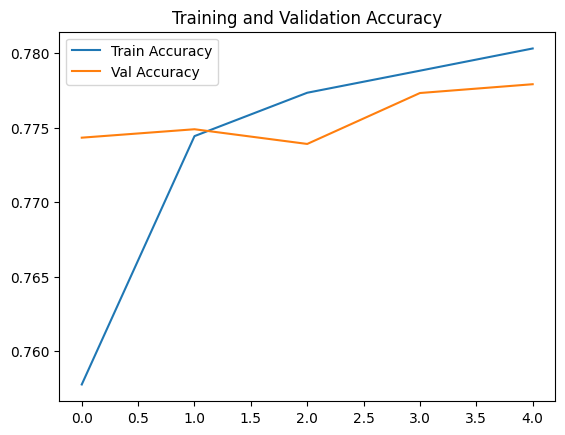

In [ ]:
# Độ chính xác
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Biểu đồ loss và accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()
